## **Data Preperation**

In [62]:
# Mathematical operations and calculations
import math

# Statistical data visualization library built on matplotlib
import seaborn as sns

# Date and time handling modules
import datetime as dt
from datetime import datetime

# Set the default aesthetic style of seaborn plots to whitegrid
sns.set_style("whitegrid")

# Specialized plotting functions from pandas for time series analysis
from pandas.plotting import autocorrelation_plot

# Main plotting library for creating visualizations
import matplotlib.pyplot as plt

# Enable inline plotting in Jupyter notebooks (displays plots directly in notebook)
%matplotlib inline

# Set the default plotting style to 'ggplot' for better-looking plots
plt.style.use("ggplot")

# Data manipulation and analysis library
import pandas as pd

# Numerical computing library for array operations and mathematical functions
import numpy as np

# Operating system interface for file and directory operations
import os

# Warning control module to suppress unnecessary warning messages
import warnings
warnings.filterwarnings("ignore")  # Suppress all warning messages during execution

In [63]:
# Load the preprocessed stock market data from CSV file
# The data is expected to be in the 'processed_data' directory relative to current location
data = pd.read_csv('./processed_data/data.csv')

# Display the first 5 rows of the dataset to understand the structure
# This helps us see the column names, data types, and sample values
data.head()

,Date,Close,High,Low,Open,Volume
0,2002-05-23,1.196429,1.242857,1.145714,1.156429,104790000
1,2002-05-24,1.210000,1.225000,1.197143,1.214286,11104800
2,2002-05-28,1.157143,1.232143,1.157143,1.213571,6609400
3,2002-05-29,1.103571,1.164286,1.085714,1.164286,6757800
4,2002-05-30,1.071429,1.107857,1.071429,1.107857,10154200


In [64]:
# Display comprehensive information about the dataset
# This includes:
# - Number of rows and columns
# - Column names and their data types
# - Memory usage of the dataframe
# - Count of non-null values in each column (helps identify missing data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5817 entries, 0 to 5816
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5817 non-null   object 
 1   Close   5817 non-null   float64
 2   High    5817 non-null   float64
 3   Low     5817 non-null   float64
 4   Open    5817 non-null   float64
 5   Volume  5817 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 272.8+ KB


In [65]:
# Generate descriptive statistics for all numerical columns in the dataset
# This provides statistical summary including:
# - count: number of non-null observations
# - mean: average value
# - std: standard deviation (measure of variability)
# - min: minimum value
# - 25%, 50%, 75%: quartiles (percentiles)
# - max: maximum value
# This helps understand the distribution and range of our stock price data
data.describe()

,Close,High,Low,Open,Volume
count,5817.000000,5817.000000,5817.000000,5817.000000,5.817000e+03
mean,175.637726,178.150233,172.948879,175.546123,1.512170e+07
std,241.103794,244.167788,237.718590,240.881717,1.835934e+07
min,0.372857,0.410714,0.346429,0.377857,2.856000e+05
25%,4.311429,4.408571,4.228571,4.318571,5.372800e+06
50%,47.448570,48.255714,46.557144,47.461430,9.346400e+06
75%,320.339996,325.790009,314.510010,320.390015,1.801990e+07
max,1339.130005,1341.150024,1321.209961,1338.229980,3.234140e+08


In [66]:
# Check for missing values (null/NaN) in each column of the dataset
# This is crucial for data quality assessment because:
# - Missing values can affect model training and predictions
# - We need to decide how to handle them (imputation, removal, etc.)
# - Returns count of null values per column
data.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

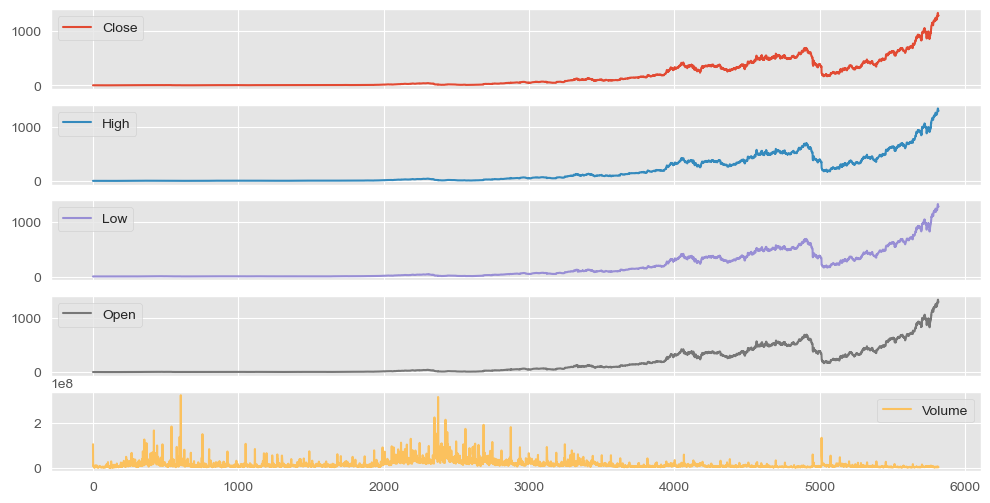

In [67]:
# Create subplots for all columns in the dataset to visualize trends and patterns
# Parameters:
# - legend=True: Show legend for each subplot
# - subplots=True: Create separate subplot for each column
# - figsize=(12, 6): Set figure size to 12 inches wide by 6 inches tall
# This visualization helps us:
# - Identify trends and patterns in stock prices over time
# - Spot any anomalies or outliers in the data
# - Understand the relationship between different price metrics (Open, High, Low, Close, Volume)
data.plot(legend=True, subplots=True, figsize=(12, 6))
plt.show()  # Display the plots

**Moving Average Calculation**

In [68]:
# Define different time periods for calculating moving averages
# Moving averages are technical indicators that smooth out price fluctuations
# to identify trends and reduce market noise
ma_day = [10, 50, 100]  # 10-day, 50-day, and 100-day moving averages

# Calculate moving averages for each specified time period
for ma in ma_day:
    # Create dynamic column name for each moving average period
    column_name = 'Moving Average %s days' % str(ma)
    
    # Calculate rolling mean (moving average) using pandas rolling function
    # Parameters:
    # - window=ma: Use 'ma' number of days for calculation window
    # - min_periods=1: Minimum number of observations required to have a value
    #   (this ensures we get values even for the first few rows)
    # Rolling average formula: sum of last 'ma' closing prices / ma
    data[column_name] = data['Close'].rolling(window=ma, min_periods=1).mean()

# Display first 20 rows to see the newly calculated moving averages
# This helps verify our calculations and see how the moving averages
# smooth out the daily price fluctuations
data.head(20)

,Date,Close,High,Low,Open,Volume,Moving Average 10 days,Moving Average 50 days,Moving Average 100 days
0,2002-05-23,1.196429,1.242857,1.145714,1.156429,104790000,1.196429,1.196429,1.196429
1,2002-05-24,1.210000,1.225000,1.197143,1.214286,11104800,1.203215,1.203215,1.203215
2,2002-05-28,1.157143,1.232143,1.157143,1.213571,6609400,1.187857,1.187857,1.187857
3,2002-05-29,1.103571,1.164286,1.085714,1.164286,6757800,1.166786,1.166786,1.166786
4,2002-05-30,1.071429,1.107857,1.071429,1.107857,10154200,1.147714,1.147714,1.147714
5,2002-05-31,1.076429,1.078571,1.071429,1.078571,8464400,1.135834,1.135834,1.135834
6,2002-06-03,1.128571,1.149286,1.076429,1.080000,3151400,1.134796,1.134796,1.134796
7,2002-06-04,1.117857,1.140000,1.110714,1.135714,3105200,1.132679,1.132679,1.132679
8,2002-06-05,1.147143,1.159286,1.107143,1.110714,1531600,1.134286,1.134286,1.134286
9,2002-06-06,1.182143,1.232143,1.148571,1.150000,2305800,1.139072,1.139072,1.139072


**Percent Change Calculation**

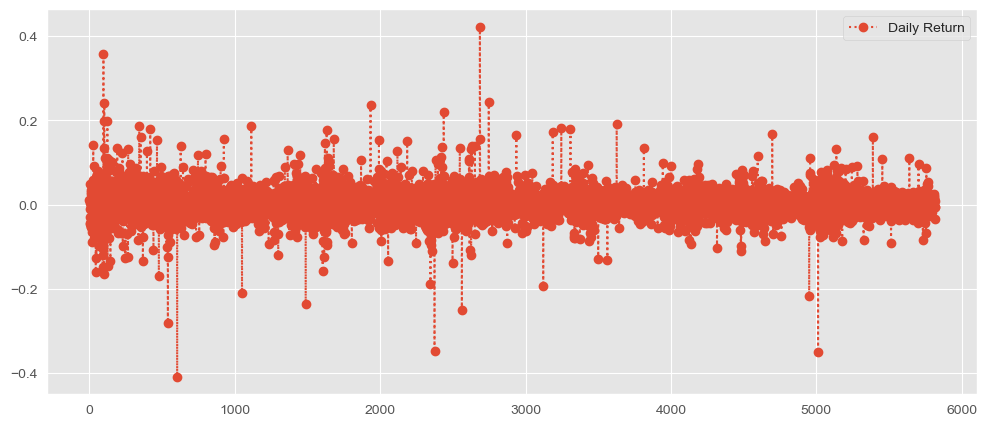

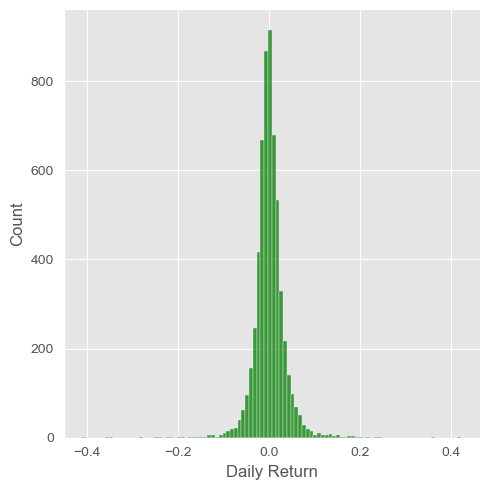

In [69]:
# Calculate daily percentage change in closing price
# This represents the daily return/gain or loss as a percentage
# Formula: (Price_today - Price_yesterday) / Price_yesterday
# pct_change(1) calculates percentage change from previous period (1 day ago)
data['Daly Return'] = data['Close'].pct_change(1)

# Fix the typo in column name from 'Daly Return' to 'Daily Return'
data = data.rename(columns={'Daly Return': 'Daily Return'})

# Create a time series plot of daily returns
# Parameters:
# - figsize=(12,5): Set plot size
# - legend=True: Show legend
# - linestyle=':': Use dotted line style
# - marker='o': Use circle markers for data points
# This plot helps visualize:
# - Volatility patterns in stock returns
# - Periods of high and low market activity
# - Overall trend in daily price changes
data['Daily Return'].plot(figsize=(12,5), legend=True, linestyle=':', marker='o')
plt.show()

# Create a histogram (distribution plot) of daily returns
# This shows the frequency distribution of daily return values
# Parameters:
# - dropna(): Remove any NaN values before plotting
# - bins=100: Create 100 bins for the histogram
# - color='green': Set histogram color to green
# This helps understand:
# - The distribution shape of returns (normal, skewed, etc.)
# - Most common return values
# - Presence of extreme positive or negative returns (outliers)
sns.displot(data['Daily Return'].dropna(), bins=100, color='green')
plt.show()

In [70]:
# Create separate dataframes for date and closing price
# This is useful for later analysis and potential data reshaping
date = pd.DataFrame(data['Date'])  # Extract only the Date column
closing_df1 = pd.DataFrame(data['Close'])  # Extract only the Close price column

# Rename the Close column to 'data_close' for clarity
close1 = closing_df1.rename(columns={"Close": "data_close"})

# Combine date and renamed close price into a new dataframe
# axis=1 means concatenate along columns (side by side)
close2 = pd.concat([date, close1], axis=1)
close2.head()  # Display first 5 rows of the combined dataframe

# Reset the index of the main dataframe to ensure clean sequential indexing
# drop=True means don't keep the old index as a column
# inplace=True means modify the dataframe in place rather than creating a copy
data.reset_index(drop=True, inplace=True)

# Note: The fillna line is commented out, but would fill missing values with column means
# data.fillna(data.mean(), inplace=True)

data.head()  # Display first 5 rows after index reset

# Count unique values in each column
# This helps identify:
# - Categorical columns (low unique count)
# - Continuous variables (high unique count)
# - Potential data quality issues
data.nunique()

# Sort columns alphabetically for better organization
# axis=1 means sort along columns (column names)
# ascending=True means sort in alphabetical order A-Z
data.sort_index(axis=1, ascending=True)

# Define columns for detailed plotting analysis
# These represent the core stock market indicators
cols_plot = ['Open', 'High', 'Low', 'Close', 'Volume', 
             'Moving Average 10 days', 'Moving Average 50 days', 
             'Moving Average 100 days', 'Daily Return']

# Create subplots for selected columns with scatter plot style
# Parameters:
# - marker='.': Use dot markers for each data point
# - alpha=0.7: Set transparency to 70% for better visualization
# - linestyle='None': Don't connect points with lines (scatter plot)
# - figsize=(11, 9): Set overall figure size
# - subplots=True: Create separate subplot for each column
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', 
                           figsize=(11, 9), subplots=True)

# Add y-label to each subplot for clarity
for ax in axes:
    ax.set_ylabel('Daily trade')

# Create a simple line plot focusing only on closing price
# This provides a clear view of the stock's price movement over time
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")  # Label for x-axis
plt.ylabel("Closing price")  # Label for y-axis

# Create a copy of the dataframe for further processing
df = data
print(df)  # Display the entire dataframe

# Check again for missing values after all preprocessing steps
# This ensures our data is clean before model training
data.isnull().sum()

            Date        Close         High          Low         Open  \
0     2002-05-23     1.196429     1.242857     1.145714     1.156429   
1     2002-05-24     1.210000     1.225000     1.197143     1.214286   
2     2002-05-28     1.157143     1.232143     1.157143     1.213571   
3     2002-05-29     1.103571     1.164286     1.085714     1.164286   
4     2002-05-30     1.071429     1.107857     1.071429     1.107857   
...          ...          ...          ...          ...          ...   
5812  2025-06-30  1339.130005  1341.150024  1321.209961  1331.000000   
5813  2025-07-01  1293.599976  1338.770020  1282.219971  1338.229980   
5814  2025-07-02  1284.859985  1299.949951  1271.589966  1296.959961   
5815  2025-07-03  1297.180054  1302.260010  1279.760010  1292.000000   
5816  2025-07-07  1289.619995  1295.000000  1276.020020  1295.000000   

         Volume  Moving Average 10 days  Moving Average 50 days  \
0     104790000                1.196429                1.196429   
1

Date                       0
Close                      0
High                       0
Low                        0
Open                       0
Volume                     0
Moving Average 10 days     0
Moving Average 50 days     0
Moving Average 100 days    0
Daily Return               1
dtype: int64

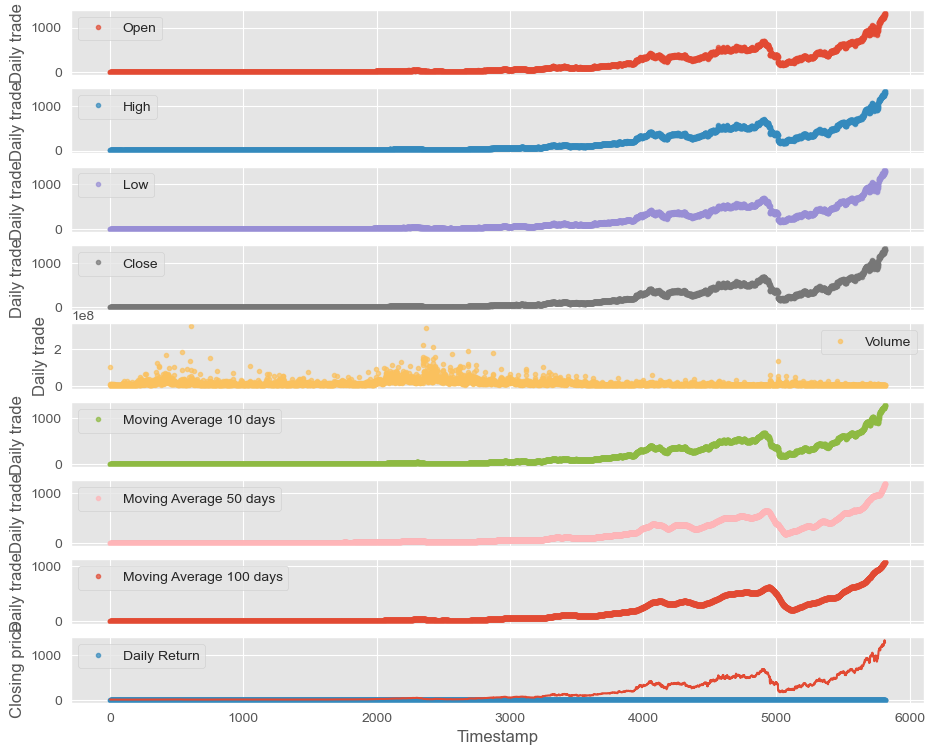

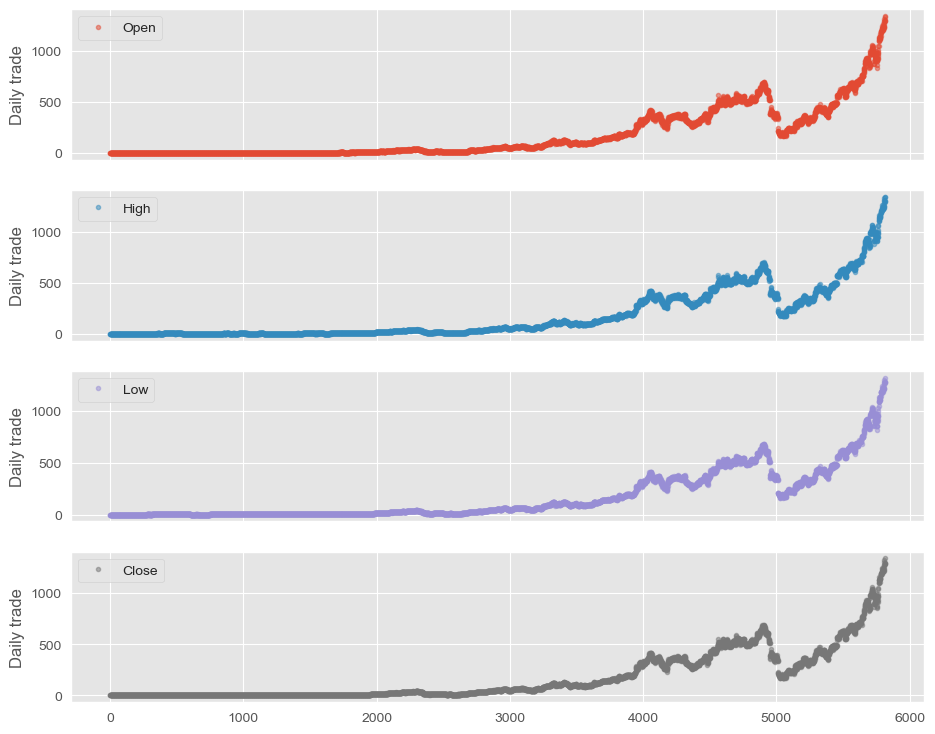

In [71]:
# Define core OHLC (Open, High, Low, Close) columns for focused analysis
# These are the fundamental price points for each trading day
cols_plot = ['Open', 'High', 'Low', 'Close']

# Create scatter plot subplots for OHLC data
# This visualization helps identify:
# - Price ranges and volatility patterns
# - Relationships between opening and closing prices
# - Daily high-low spreads (trading ranges)
# Parameters:
# - marker='.': Use small dot markers for each data point
# - alpha=0.5: Set 50% transparency to see overlapping points
# - linestyle='None': Create scatter plot without connecting lines
# - figsize=(11, 9): Set figure dimensions
# - subplots=True: Create separate subplot for each OHLC component
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                           figsize=(11, 9), subplots=True)

# Add descriptive y-axis labels to each subplot
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.show()  # Display the plots

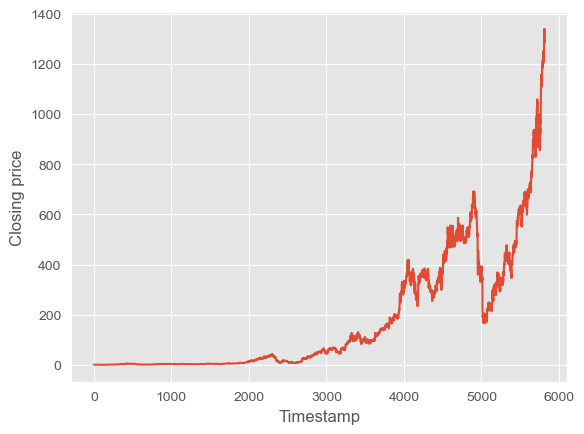

            Date        Close         High          Low         Open  \
0     2002-05-23     1.196429     1.242857     1.145714     1.156429   
1     2002-05-24     1.210000     1.225000     1.197143     1.214286   
2     2002-05-28     1.157143     1.232143     1.157143     1.213571   
3     2002-05-29     1.103571     1.164286     1.085714     1.164286   
4     2002-05-30     1.071429     1.107857     1.071429     1.107857   
...          ...          ...          ...          ...          ...   
5812  2025-06-30  1339.130005  1341.150024  1321.209961  1331.000000   
5813  2025-07-01  1293.599976  1338.770020  1282.219971  1338.229980   
5814  2025-07-02  1284.859985  1299.949951  1271.589966  1296.959961   
5815  2025-07-03  1297.180054  1302.260010  1279.760010  1292.000000   
5816  2025-07-07  1289.619995  1295.000000  1276.020020  1295.000000   

         Volume  Moving Average 10 days  Moving Average 50 days  \
0     104790000                1.196429                1.196429   
1

,count,mean,std,min,25%,50%,75%,max
Close,5817.0,1.756377e+02,2.411038e+02,0.372857,4.311429e+00,4.744857e+01,3.203400e+02,1.339130e+03
High,5817.0,1.781502e+02,2.441678e+02,0.410714,4.408571e+00,4.825571e+01,3.257900e+02,1.341150e+03
Low,5817.0,1.729489e+02,2.377186e+02,0.346429,4.228571e+00,4.655714e+01,3.145100e+02,1.321210e+03
Open,5817.0,1.755461e+02,2.408817e+02,0.377857,4.318571e+00,4.746143e+01,3.203900e+02,1.338230e+03
Volume,5817.0,1.512170e+07,1.835934e+07,285600.000000,5.372800e+06,9.346400e+06,1.801990e+07,3.234140e+08
Moving Average 10 days,5817.0,1.746333e+02,2.389420e+02,0.469714,4.328000e+00,4.774543e+01,3.191960e+02,1.294208e+03
Moving Average 50 days,5817.0,1.704317e+02,2.303065e+02,0.631657,4.209457e+00,4.790743e+01,3.175376e+02,1.203724e+03
Moving Average 100 days,5817.0,1.658701e+02,2.219194e+02,0.728229,4.079200e+00,4.375640e+01,3.154125e+02,1.081681e+03
Daily Return,5816.0,1.809555e-03,3.471881e-02,-0.409065,-1.370669e-02,4.197304e-04,1.649418e-02,4.222351e-01


In [72]:
# Create a clean line plot of closing prices over time
# This is the primary indicator for stock performance and the main target for prediction
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")  # Time dimension (trading days/periods)
plt.ylabel("Closing price")  # Price dimension (currency value)
plt.show()  # Display the plot

# Assign the processed dataframe to 'df' for model training
df = data
print(df)  # Display complete dataframe with all calculated features

# Generate transposed descriptive statistics for better readability
# transpose() rotates the statistics table so:
# - Columns become rows (each variable gets its own row)
# - Statistics (count, mean, std, etc.) become columns
# This format is easier to read when dealing with many variables
df.describe().transpose()

**Splitting the Data into train test split**

In [73]:
# Import train_test_split for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Initialize empty lists to store features (X) and targets (Y)
X = []  # Will store sequences of normalized price changes (features)
Y = []  # Will store next-day price change (target to predict)

# Define the window size for sequence learning
# This determines how many previous days the model will look at to predict the next day
window_size = 100  # Use 100 days of historical data to predict next day

# Create sliding window sequences from the time series data
# Loop through the dataset, leaving space for the window and target
for i in range(1, len(df) - window_size - 1, 1):
    
    # Get the baseline price (starting point for normalization)
    # Using column index 2 which corresponds to 'Close' price
    first = df.iloc[i, 2]
    
    # Initialize temporary lists for current sequence
    temp = []   # Will store normalized price changes for the sequence
    temp2 = []  # Will store the target (next day's normalized change)
    
    # Create a sequence of normalized price changes over the window
    for j in range(window_size):
        # Calculate normalized return relative to the baseline price
        # Formula: (current_price - baseline_price) / baseline_price
        # This gives percentage change from the starting point
        normalized_change = (df.iloc[i + j, 2] - first) / first
        temp.append(normalized_change)
    
    # Calculate the target: next day's normalized price change
    # This is what we want the model to predict
    target_change = (df.iloc[i + window_size, 2] - first) / first
    temp2.append(target_change)
    
    # Reshape and store the sequence and target
    # Reshape to (100, 1) for CNN-LSTM input format
    X.append(np.array(temp).reshape(100, 1))
    # Reshape to (1, 1) for single target value
    Y.append(np.array(temp2).reshape(1, 1))

# Split the data into training and testing sets
# Parameters:
# - test_size=0.2: Use 20% of data for testing, 80% for training
# - shuffle=True: Randomly shuffle the data before splitting
#   (Important for time series to avoid temporal bias)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

# Convert lists to numpy arrays for efficient computation
train_X = np.array(x_train)  # Training features
test_X = np.array(x_test)    # Testing features  
train_Y = np.array(y_train)  # Training targets
test_Y = np.array(y_test)    # Testing targets

# Reshape data for CNN-LSTM model input
# Required shape: (samples, time_steps, features, channels)
# - samples: number of sequences
# - time_steps: 1 (treating each sequence as single time step for CNN)
# - features: 100 (window size - length of each sequence)
# - channels: 1 (single feature channel - price)
train_X = train_X.reshape(train_X.shape[0], 1, 100, 1)
test_X = test_X.reshape(test_X.shape[0], 1, 100, 1)

# Print dataset sizes to verify the split
print(len(train_X))  # Number of training samples
print(len(test_X))   # Number of testing samples

4572
1143


In [74]:
!pip install -U "ray[data,train,tune,serve]" # You can also use: pip install "ray[train]>=2.10.0"

  Using cached ray-2.47.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (20 kB)
  Using cached ray-2.47.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (20 kB)
  Using cached opentelemetry_exporter_prometheus-0.56b0-py3-none-any.whl.metadata (1.8 kB)
  Using cached opentelemetry_exporter_prometheus-0.56b0-py3-none-any.whl.metadata (1.8 kB)
  Using cached opentelemetry_sdk-1.35.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached opentelemetry_sdk-1.35.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached opentelemetry_api-1.35.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached opentelemetry_api-1.35.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached opentelemetry_semantic_conventions-0.56b0-py3-none-any.whl.metadata (2.4 kB)
  Using cached opentelemetry_semantic_conventions-0.56b0-py3-none-any.whl.metadata (2.4 kB)
  Using cached protobuf-4.25.8-cp37-abi3-macosx_10_9_universal2.whl.metadata (541 bytes)
Using cached ray-2.47.1-cp312-cp312-macosx_11_0_arm64.whl (66.1 MB)
  Using cached protobuf

In [75]:
import os
import ray
import mlflow
import torch
import torch.nn as nn
import lightning.pytorch as pl

from torch.utils.data import DataLoader, TensorDataset
from pytorch_lightning.loggers import MLFlowLogger
from ray.train import ScalingConfig, RunConfig
from ray.train.torch import TorchTrainer
from ray.train.lightning import RayLightningEnvironment
import dagshub

dagshub.init(repo_owner='ritayanpatra98', repo_name='stock-prediction', mlflow=True)

Initialized MLflow to track repo "ritayanpatra98/stock-prediction"

Repository ritayanpatra98/stock-prediction initialized!

## **Training the Model**

In [84]:
class CNNBiLSTM(pl.LightningModule):
    def __init__(self):
        super(CNNBiLSTM, self).__init__()

        # CNN expects input shape (B, 1, 100, 1), we will flatten to (B, 1, 100) → treat 100 as time steps
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(64, 128, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(128, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2)
        )

        # Calculate the CNN output size
        self._cnn_output_dim = self._calculate_cnn_output_dim()

        # LSTM expects input shape: (batch, seq_len, input_size)
        self.lstm1 = nn.LSTM(input_size=self._cnn_output_dim, hidden_size=128, batch_first=True, bidirectional=True)
        self.lstm2 = nn.LSTM(input_size=256, hidden_size=64, batch_first=True, bidirectional=True)

        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(128, 1)  # 128 = 64*2 from bidirectional LSTM

        self.loss_fn = nn.MSELoss()

    def _calculate_cnn_output_dim(self):
        # Dummy input to determine CNN output dimension
        dummy_input = torch.zeros(1, 1, 100)  # (batch, channels, length)
        output = self.cnn(dummy_input)
        return output.shape[2]  # Output length of time series after CNN

    def forward(self, x):
        # x: (B, 1, 100, 1)
        B = x.shape[0]

        # Squeeze to (B, 1, 100)
        x = x.squeeze(-1)

        # Pass through CNN: (B, 1, 100) → (B, 64, L)
        x = self.cnn(x)

        # Permute to (B, L, 64) for LSTM input
        x = x.permute(0, 2, 1)

        x, _ = self.lstm1(x)
        x = self.dropout(x)
        x, _ = self.lstm2(x)
        x = self.dropout(x)

        # Take the last output for prediction
        x = x[:, -1, :]
        x = self.fc(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x).squeeze(-1)
        y = y.squeeze(-1).squeeze(-1)  # (B)
        loss = self.loss_fn(y_hat, y)
        self.log("train_loss", loss)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x).squeeze(-1)
        y = y.squeeze(-1).squeeze(-1)
        loss = self.loss_fn(y_hat, y)
        self.log("val_loss", loss)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)  

In [77]:
import mlflow
import dagshub
from lightning.pytorch.loggers import MLFlowLogger


In [81]:
def train_func(config):
    dagshub.init(repo_owner='ritayanpatra98', repo_name='stock-prediction', mlflow=True)
    mlflow.set_experiment("CNN_BiLSTM_Stock")
    mlflow.pytorch.autolog()

    train_loader = DataLoader(
        TensorDataset(config["train_X"], config["train_Y"]),
        batch_size=40,
        shuffle=True
    )
    val_loader = DataLoader(
        TensorDataset(config["val_X"], config["val_Y"]),
        batch_size=40
    )

    model = CNNBiLSTM()

    trainer = pl.Trainer(
        max_epochs=40,
        logger=MLFlowLogger(experiment_name="CNN_BiLSTM_Stock"),
        accelerator="gpu" if torch.cuda.is_available() else "cpu",
        devices=1
        # strategy=RayLightningEnvironment()
    )

    with mlflow.start_run():
        mlflow.log_param("model", "CNN + BiLSTM")
        mlflow.log_param("batch_size", 40)
        mlflow.log_param("epochs", 40)
        mlflow.log_param("dropout", 0.5)
        mlflow.log_param("optimizer", "Adam")
        trainer.fit(model, train_loader, val_loader)

In [82]:
def run_pipeline(train_X, train_Y, test_X, test_Y):
    ray.init(ignore_reinit_error=True)

    trainer = TorchTrainer(
        train_func,
        scaling_config=ScalingConfig(num_workers=1, use_gpu=torch.cuda.is_available()),
        run_config=RunConfig(name="cnn_bilstm_run"),
        train_loop_config={
            "train_X": torch.tensor(train_X, dtype=torch.float32),
            "train_Y": torch.tensor(train_Y, dtype=torch.float32),
            "val_X": torch.tensor(test_X, dtype=torch.float32),
            "val_Y": torch.tensor(test_Y, dtype=torch.float32)
        }
    )

    result = trainer.fit()
    print("Training completed. Check DagsHub/MLflow for experiment logs.")


In [85]:
run_pipeline(train_X, train_Y, test_X, test_Y)

2025-07-17 13:31:21,305	INFO worker.py:1649 -- Calling ray.init() again after it has already been called.
2025-07-17 13:31:21,399	INFO tune.py:616 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949
2025-07-17 13:31:21,399	INFO tune.py:616 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


== Status ==
Current time: 2025-07-17 13:31:21 (running for 00:00:00.16)
Using FIFO scheduling algorithm.
Logical resource usage: 2.0/8 CPUs, 0/0 GPUs
Result logdir: /tmp/ray/session_2025-07-17_13-24-23_750548_70039/artifacts/2025-07-17_13-31-21/cnn_bilstm_run/driver_artifacts
Number of trials: 1/1 (1 PENDING)


== Status ==
Current time: 2025-07-17 13:31:26 (running for 00:00:05.25)
Using FIFO scheduling algorithm.
Logical resource usage: 2.0/8 CPUs, 0/0 GPUs
Result logdir: /tmp/ray/session_2025-07-17_13-24-23_750548_70039/artifacts/2025-07-17_13-31-21/cnn_bilstm_run/driver_artifacts
Number of trials: 1/1 (1 PENDING)


== Status ==
Current time: 2025-07-17 13:31:26 (running for 00:00:05.25)
Using FIFO scheduling algorithm.
Logical resource usage: 2.0/8 CPUs, 0/0 GPUs
Result logdir: /tmp/ray/session_2025-07-17_13-24-23_750548_70039/artifacts/2025-07-17_13-31-21/cnn_bilstm_run/driver_artifacts
Number of trials: 1/1 (1 PENDING)




(TorchTrainer pid=84213) Started distributed worker processes: 
(TorchTrainer pid=84213) - (node_id=4645520d09b275be02956c49f5321c832a115efe8b9110198fa7e0d1, ip=127.0.0.1, pid=84234) world_rank=0, local_rank=0, node_rank=0
(RayTrainWorker pid=84234) Setting up process group for: env:// [rank=0, world_size=1]


== Status ==
Current time: 2025-07-17 13:31:31 (running for 00:00:10.31)
Using FIFO scheduling algorithm.
Logical resource usage: 2.0/8 CPUs, 0/0 GPUs
Result logdir: /tmp/ray/session_2025-07-17_13-24-23_750548_70039/artifacts/2025-07-17_13-31-21/cnn_bilstm_run/driver_artifacts
Number of trials: 1/1 (1 RUNNING)


(RayTrainWorker pid=84234) Accessing as ritayanpatra98
(RayTrainWorker pid=84234) Accessing as ritayanpatra98
(RayTrainWorker pid=84234) Initialized MLflow to track repo "ritayanpatra98/stock-prediction"
(RayTrainWorker pid=84234) Repository ritayanpatra98/stock-prediction initialized!
(RayTrainWorker pid=84234) Initialized MLflow to track repo "ritayanpatra98/stock-prediction"
(RayTrainWorker pid=84234) Repository ritayanpatra98/stock-prediction initialized!
== Status ==
Current time: 2025-07-17 13:31:36 (running for 00:00:15.41)
Using FIFO scheduling algorithm.
Logical resource usage: 2.0/8 CPUs, 0/0 GPUs
Result logdir: /tmp/ray/session_2025-07-17_13-24-23_750548_70039/artifa

(RayTrainWorker pid=84234) INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
(RayTrainWorker pid=84234) INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (mps), used: False
(RayTrainWorker pid=84234) INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
(RayTrainWorker pid=84234) INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
(RayTrainWorker pid=84234) /opt/anaconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]


(RayTrainWorker pid=84234) 
(RayTrainWorker pid=84234)   | Name    | Type       | Params | Mode 
(RayTrainWorker pid=84234) -----------------------------------------------
(RayTrainWorker pid=84234) 0 | cnn     | Sequential | 49.6 K | train
(RayTrainWorker pid=84234) 1 | lstm1   | LSTM       | 143 K  | train
(RayTrainWorker pid=84234) 2 | lstm2   | LSTM       | 164 K  | train
(RayTrainWorker pid=84234) 3 | dropout | Dropout    | 0      | train
(RayTrainWorker pid=84234) 4 | fc      | Linear     | 129    | train
(RayTrainWorker pid=84234) 5 | loss_fn | MSELoss    | 0      | train
(RayTrainWorker pid=84234) -----------------------------------------------
(RayTrainWorker pid=84234) 357 K     Trainable params
(RayTrainWorker pid=84234) 0         Non-trainable params
(RayTrainWorker pid=84234) 357 K     Total params
(RayTrainWorker pid=84234) 1.432     Total estimated model params size (MB)
(RayTrainWorker pid=84234) 15        Modules in train mode
(RayTrainWorker pid=84234) 0         Modul

(RayTrainWorker pid=84234) 🏃 View run awesome-crab-472 at: https://dagshub.com/ritayanpatra98/stock-prediction.mlflow/#/experiments/6/runs/041f8c86a0ee4a0e8df425d0189d0947
(RayTrainWorker pid=84234) 🧪 View experiment at: https://dagshub.com/ritayanpatra98/stock-prediction.mlflow/#/experiments/6
(RayTrainWorker pid=84234) 🏃 View run agreeable-robin-351 at: https://dagshub.com/ritayanpatra98/stock-prediction.mlflow/#/experiments/6/runs/7a3ac1cb933a4c8794a0bf71199897bb
(RayTrainWorker pid=84234) 🧪 View experiment at: https://dagshub.com/ritayanpatra98/stock-prediction.mlflow/#/experiments/6
(RayTrainWorker pid=84234) 🏃 View run agreeable-robin-351 at: https://dagshub.com/ritayanpatra98/stock-prediction.mlflow/#/experiments/6/runs/7a3ac1cb933a4c8794a0bf71199897bb
(RayTrainWorker pid=84234) 🧪 View experiment at: https://dagshub.com/ritayanpatra98/stock-prediction.mlflow/#/experiments/6
== Status ==
Current time: 2025-07-17 13:31:41 (running for 00:00:20.50)
Using FIFO scheduling algorithm.


(RayTrainWorker pid=84234) /opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
(RayTrainWorker pid=84234)   warnings.warn('resource_tracker: There appear to be %d '
2025-07-17 13:31:42,414	ERROR tune_controller.py:1331 -- Trial task failed for trial TorchTrainer_dad1b_00000
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3

== Status ==
Current time: 2025-07-17 13:31:42 (running for 00:00:21.05)
Using FIFO scheduling algorithm.
Logical resource usage: 2.0/8 CPUs, 0/0 GPUs
Result logdir: /tmp/ray/session_2025-07-17_13-24-23_750548_70039/artifacts/2025-07-17_13-31-21/cnn_bilstm_run/driver_artifacts
Number of trials: 1/1 (1 ERROR)
Number of errored trials: 1
+--------------------------+--------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               |   # failures | error file                                                                                                                                                               |
|--------------------------+--------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| TorchTrainer_da

TrainingFailedError: The Ray Train run failed. Please inspect the previous error messages for a cause. After fixing the issue (assuming that the error is not caused by your own application logic, but rather an error such as OOM), you can restart the run from scratch or continue this run.
To continue this run, you can use: `trainer = TorchTrainer.restore("/Users/ritayanpatra/ray_results/cnn_bilstm_run")`.
To start a new run that will retry on training failures, set `train.RunConfig(failure_config=train.FailureConfig(max_failures))` in the Trainer's `run_config` with `max_failures > 0`, or `max_failures = -1` for unlimited retries.